In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

file_path = 'GP2Data.xls'
df = pd.read_excel(file_path)

df=df.dropna()

utown_dates = df.loc[df['Area'] == 'UTOWN', 'Date']
engine_dates = df.loc[df['Area'] == 'ENGINE', 'Date']

common_dates = set(utown_dates).intersection(set(engine_dates))

df_filtered = df[df['Date'].isin(common_dates)]

In [55]:
df_filtered['Phase2'] = df_filtered['FirstTrialPhase'].apply(lambda x: 1 if x == 2 else 0)
df_filtered['Phase3'] = df_filtered['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)

df_filtered['UTOWN'] = df_filtered['Area'].apply(lambda x: 1 if x == 'UTOWN' else 0)

df_filtered['Phase2_UTOWN'] = df_filtered['Phase2'] * df_filtered['UTOWN']
df_filtered['Phase3_UTOWN'] = df_filtered['Phase3'] * df_filtered['UTOWN']


/var/folders/_h/c_jljf714sxgr8_wdl2s789m0000gn/T/ipykernel_69779/2472508388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Phase2'] = df_filtered['FirstTrialPhase'].apply(lambda x: 1 if x == 2 else 0)
/var/folders/_h/c_jljf714sxgr8_wdl2s789m0000gn/T/ipykernel_69779/2472508388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Phase3'] = df_filtered['FirstTrialPhase'].apply(lambda x: 1 if x == 3 else 0)
/var/folders/_h/c_jljf714sxgr8_wdl2s789m0000gn/T/ipykernel_69779/247250838

In [57]:
df_filtered

,Area,Date,PaperContaminant,PlasticContaminant,CanContaminant,FirstTrialPhase,Phase2,Phase3,UTOWN,Phase2_UTOWN,Phase3_UTOWN
2,ENGINE,2020-01-15,0.714286,35.340136,0.869565,1.0,0,0,0,0,0
8,ENGINE,2020-01-17,1.285714,50.483325,29.047619,1.0,0,0,0,0,0
11,ENGINE,2020-01-18,1.714286,47.214206,12.222222,1.0,0,0,0,0,0
14,ENGINE,2020-01-19,0.285714,44.444444,0.000000,1.0,0,0,0,0,0
17,ENGINE,2020-01-20,0.571429,44.409171,2.500000,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
242,UTOWN,2020-03-12,6.888889,55.657396,26.180556,3.0,0,1,1,0,1
245,UTOWN,2020-03-13,3.555556,56.030446,14.748299,3.0,0,1,1,0,1
248,UTOWN,2020-03-14,3.444444,61.640623,22.269166,3.0,0,1,1,0,1
251,UTOWN,2020-03-16,6.888889,55.657396,26.180556,3.0,0,1,1,0,1


## OLS

In [ ]:
Y = df_filtered['PaperContaminant']

# Define the independent variables (Phase2, Phase3, UTOWN, interactions)
X = df_filtered[['Phase2', 'Phase3', 'UTOWN', 'Phase2_UTOWN', 'Phase3_UTOWN']]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS regression model
Paper_model = sm.OLS(Y, X).fit()

# Display the results
print(Paper_model.summary())

                            OLS Regression Results                            
Dep. Variable:       PaperContaminant   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     16.63
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           6.88e-11
Time:                        13:58:24   Log-Likelihood:                -165.72
No. Observations:                  78   AIC:                             343.4
Df Residuals:                      72   BIC:                             357.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8695      0.511      1.701   

In [62]:
Y = df_filtered['PlasticContaminant']

# Define the independent variables (Phase2, Phase3, UTOWN, interactions)
X = df_filtered[['Phase2', 'Phase3', 'UTOWN', 'Phase2_UTOWN', 'Phase3_UTOWN']]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS regression model
Plastic_model = sm.OLS(Y, X).fit()

# Display the results
print(Plastic_model.summary())


                            OLS Regression Results                            
Dep. Variable:     PlasticContaminant   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     16.81
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           5.65e-11
Time:                        13:58:25   Log-Likelihood:                -274.33
No. Observations:                  78   AIC:                             560.7
Df Residuals:                      72   BIC:                             574.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           49.0448      2.058     23.836   

In [64]:
Y = df_filtered['CanContaminant']

# Define the independent variables (Phase2, Phase3, UTOWN, interactions)
X = df_filtered[['Phase2', 'Phase3', 'UTOWN', 'Phase2_UTOWN', 'Phase3_UTOWN']]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS regression model
Can_model = sm.OLS(Y, X).fit()

# Display the results
print(Can_model.summary())


                            OLS Regression Results                            
Dep. Variable:         CanContaminant   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     17.48
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           2.68e-11
Time:                        13:58:25   Log-Likelihood:                -279.32
No. Observations:                  78   AIC:                             570.6
Df Residuals:                      72   BIC:                             584.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.7729      2.194      6.279   

## Graphs

In [67]:
df_paper = df.drop(columns = ['PlasticContaminant','CanContaminant'])
df_can = df.drop(columns = ['PaperContaminant','PlasticContaminant'])
df_plastic = df.drop(columns = ['PaperContaminant','CanContaminant'])

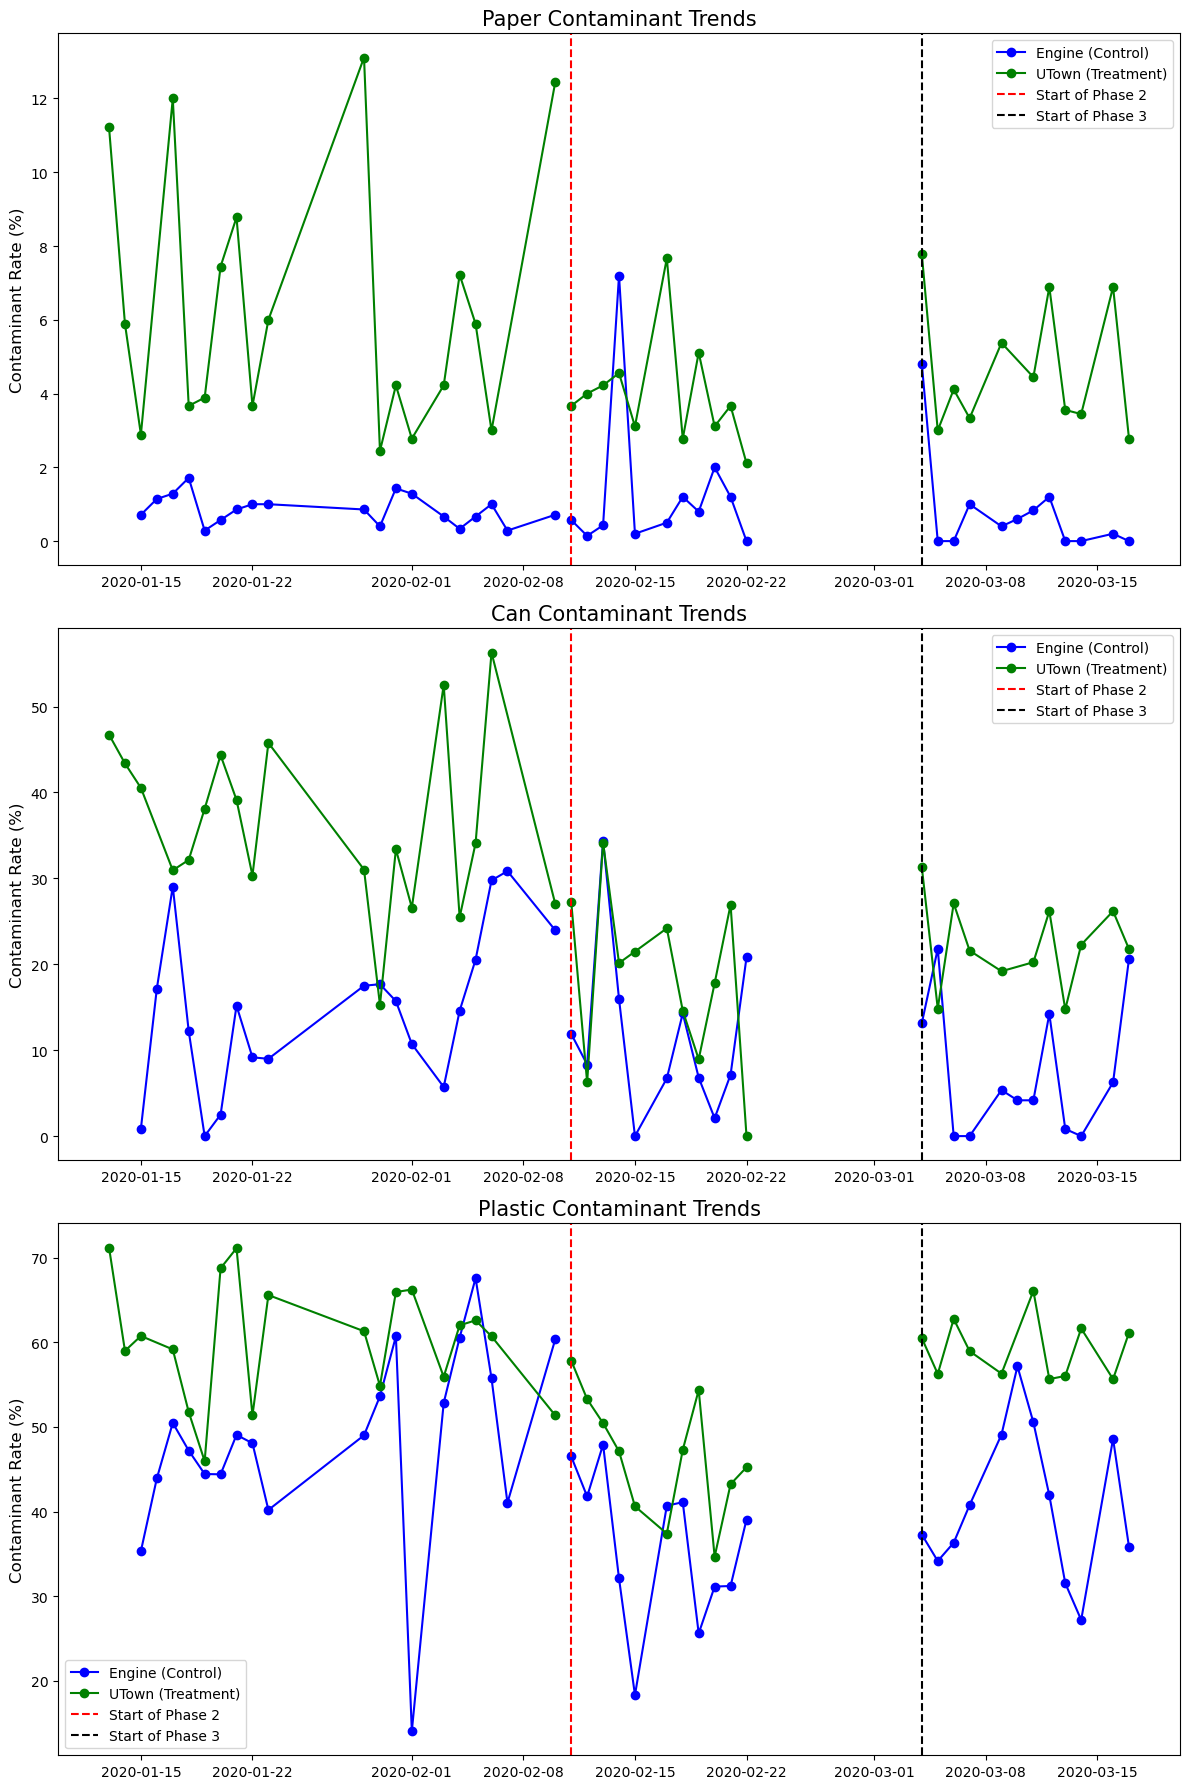

In [ ]:
df_paper['Date'] = pd.to_datetime(df_paper['Date'])
df_plastic['Date'] = pd.to_datetime(df_plastic['Date'])
df_can['Date'] = pd.to_datetime(df_can['Date'])

# Plotting setup
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

# Titles for each subplot
axs[0].set_title('Paper Contaminant Trends',fontsize=15)
axs[1].set_title('Can Contaminant Trends',fontsize=15)
axs[2].set_title('Plastic Contaminant Trends',fontsize=15)

# Labels for each axis
for ax in axs:
    #ax.set_xlabel('Date',fontsize= 12)
    ax.set_ylabel('Contaminant Rate (%)',fontsize= 12)

# Define phase dates
pre_treatment_end_date = pd.to_datetime('2020-02-10')
phase_2_start_date = pd.to_datetime('2020-02-11')
phase_2_end_date = pd.to_datetime('2020-02-22')
phase_3_start_date = pd.to_datetime('2020-03-04')

# DataFrames and contaminants
dfs = [df_paper, df_can, df_plastic]
contaminants = ['PaperContaminant', 'CanContaminant', 'PlasticContaminant']

# Loop through each area and each type of contaminant
for i, df in enumerate(dfs):
    for area in ['ENGINE', 'UTOWN']:
        subset = df[df['Area'] == area]
        # Filter data for pre-treatment, Phase 2, and Phase 3
        pre_treatment_data = subset[subset['Date'] <= pre_treatment_end_date]
        phase_2_data = subset[(subset['Date'] >= phase_2_start_date) & (subset['Date'] <= phase_2_end_date)]
        phase_3_data = subset[subset['Date'] >= phase_3_start_date]

        # Plotting pre-treatment, Phase 2, and Phase 3 data using consistent colors
        area_label = "UTown (Treatment)" if area == "UTOWN" else "Engine (Control)"
        axs[i].plot(pre_treatment_data['Date'], pre_treatment_data[contaminants[i]], label=area_label, marker='o', linestyle='-', color='green' if area == 'UTOWN' else 'blue')
        axs[i].plot(phase_2_data['Date'], phase_2_data[contaminants[i]], marker='o', linestyle='-', color='green' if area == 'UTOWN' else 'blue')
        axs[i].plot(phase_3_data['Date'], phase_3_data[contaminants[i]], marker='o', linestyle='-', color='green' if area == 'UTOWN' else 'blue')

# Vertical lines to indicate the start of Phase 2 and Phase 3
for ax in axs:
    ax.axvline(x=phase_2_start_date, color='red', linestyle='--', label='Start of Phase 2')
    ax.axvline(x=phase_3_start_date, color='black', linestyle='--', label='Start of Phase 3')

# Ensure legend only shows one entry per area
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
for ax in axs:
    ax.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

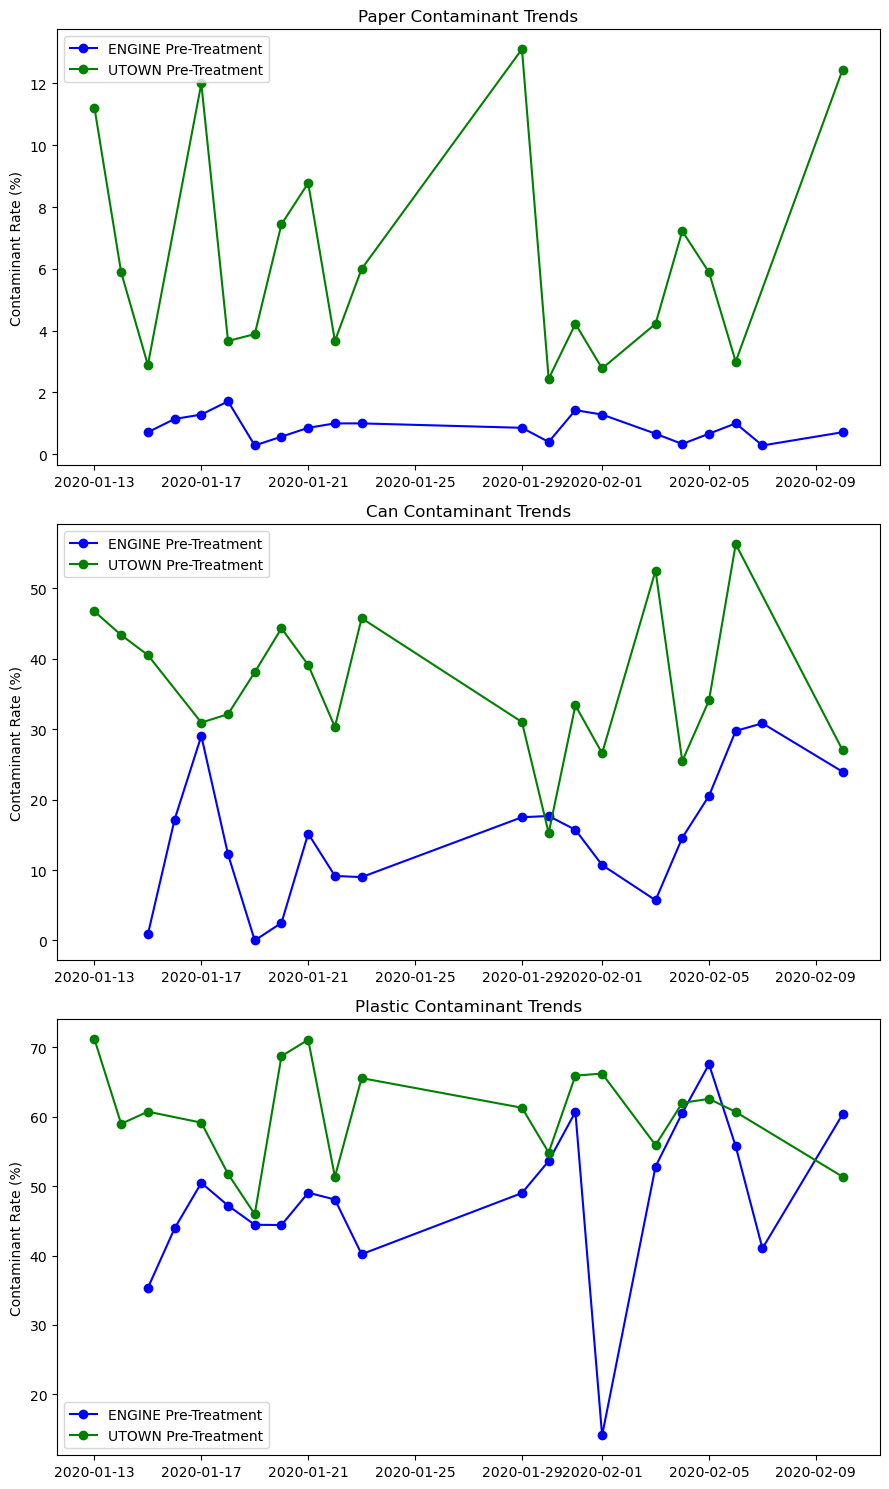

In [70]:
df_paper['Date'] = pd.to_datetime(df_paper['Date'])
df_plastic['Date'] = pd.to_datetime(df_plastic['Date'])
df_can['Date'] = pd.to_datetime(df_can['Date'])

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(9, 15), sharex=False)  # 3 plots, one for each contaminant type

# Setting titles for each subplot
axs[0].set_title('Paper Contaminant Trends')
axs[1].set_title('Can Contaminant Trends')
axs[2].set_title('Plastic Contaminant Trends')


# Setting common labels
for ax in axs:
    #ax.set_xlabel('Date')
    ax.set_ylabel('Contaminant Rate (%)')

pre_treatment_end_date = pd.to_datetime('2020-02-10')

# DataFrames array for looping
dfs = [df_paper, df_can,df_plastic]
contaminants = ['PaperContaminant', 'CanContaminant', 'PlasticContaminant']  # Assuming the column names in each DataFrame

# Loop through each area and each type of contaminant
for i, df in enumerate(dfs):
    for area in ['ENGINE', 'UTOWN']:
        subset = df[df['Area'] == area]
        pre_treatment_data = subset[subset['Date'] <= pre_treatment_end_date]

        # Plotting each type
        axs[i].plot(pre_treatment_data['Date'], pre_treatment_data[contaminants[i]], label=f'{area} Pre-Treatment', marker='o', linestyle='-', color='blue' if area == 'ENGINE' else 'green')
        axs[i].legend()


# Show the plot
plt.tight_layout()
plt.show()

# Testing for parallel trend

In [76]:
df_filtered['Time'] = df_filtered['Date'].astype(int) // 10**9

In [78]:
df_p1 = df_filtered[df_filtered['FirstTrialPhase'] == 1.0]

In [80]:
model_parallel_paper = smf.ols('PaperContaminant ~ Area * Time', data=df_p1).fit()
print(model_parallel_paper.summary())

                            OLS Regression Results                            
Dep. Variable:       PaperContaminant   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     11.47
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           3.53e-05
Time:                        13:58:28   Log-Likelihood:                -78.681
No. Observations:                  34   AIC:                             165.4
Df Residuals:                      30   BIC:                             171.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            169.5072   1464

In [82]:
model_parallel_can = smf.ols('CanContaminant ~ Area * Time', data=df_p1).fit()
print(model_parallel_can.summary())

                            OLS Regression Results                            
Dep. Variable:         CanContaminant   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     16.19
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.92e-06
Time:                        13:58:28   Log-Likelihood:                -122.38
No. Observations:                  34   AIC:                             252.8
Df Residuals:                      30   BIC:                             258.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -9725.3200   5295

In [84]:
model_parallel_plastic = smf.ols('PlasticContaminant ~ Area * Time', data=df_p1).fit()
print(model_parallel_plastic.summary())

                            OLS Regression Results                            
Dep. Variable:     PlasticContaminant   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     5.165
Date:                Sun, 20 Oct 2024   Prob (F-statistic):            0.00536
Time:                        13:58:29   Log-Likelihood:                -122.66
No. Observations:                  34   AIC:                             253.3
Df Residuals:                      30   BIC:                             259.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.156e+04   5338